Loading libraries

In [1]:
import pandas as pd
from scipy.stats import chisquare
import numpy as np 
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import chi2_contingency
import statsmodels.api as sm
import matplotlib.pyplot as plt
import functions

Loading data 

In [2]:
# reading in the data
survey_data = pd.read_excel("data/private_dataE.xlsx")
results_data = pd.read_excel("data/public_data_resultsE.xlsx")
pub_data_register = pd.read_excel('data/public_data_registerE.xlsx')

In [7]:
survey_data['age'] = 2024 - survey_data['dob'].dt.year

In [4]:
# naming the unnamed column to "where voting" as it refers to polling stations and evotes
results_data = results_data.rename(columns = {"Unnamed: 0":"where_voting"})

# creating a transformed version of the results data for evotes vs polling stations
def rename(x): 
    if "Polling station" in x: 
        return "Polling station"
    else: 
        return "E-votes"
transformed_results_data = results_data.copy()
transformed_results_data["where_voting"]= transformed_results_data["where_voting"].apply(lambda x: rename(x))
agg_functions = {'Red': 'sum','Green': 'sum', 'Invalid ballots': 'sum' ,'Total': 'sum'  }
new_results_data = transformed_results_data.groupby(transformed_results_data["where_voting"]).aggregate(agg_functions).reset_index()

Graph of party distribution for evotes and polling station for the survey data

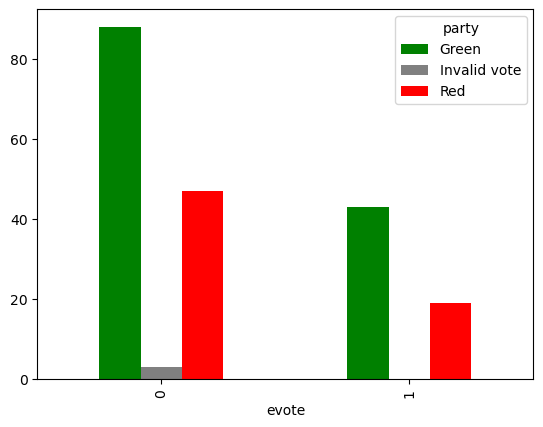

In [3]:
# Define a color list for each party
party_colors = ["green", "gray", "red"]

# Plot the survey data
plot_data = survey_data.groupby(["evote", "party"]).size().unstack().plot(kind='bar',color=party_colors)

Graph of party distribution for evotes and polling station for the results data

<Axes: xlabel='where_voting'>

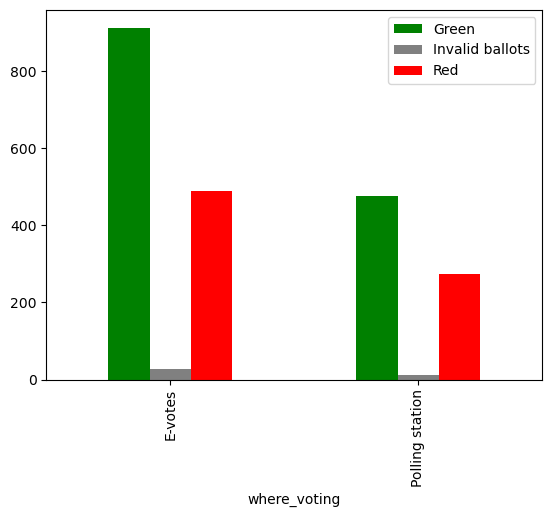

In [5]:
# Plot the results data
new_results_data.plot(
    kind='bar', 
    x='where_voting', 
    y=['Green', 'Invalid ballots', 'Red'], 
    color=party_colors,
)

EDA

In [8]:
survey_data.columns

Index(['name', 'sex', 'evote', 'dob', 'zip', 'education', 'citizenship',
       'marital_status', 'party', 'age'],
      dtype='object')

In [11]:
survey_data.groupby("age").count()

,name,sex,evote,dob,zip,education,citizenship,marital_status,party
age,,,,,,,,,
19,1,1,1,1,1,1,1,1,1
20,3,3,3,3,3,3,3,3,3
21,2,2,2,2,2,2,2,2,2
22,5,5,5,5,5,5,5,5,5
23,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...
88,1,1,1,1,1,1,1,1,1
89,1,1,1,1,1,1,1,1,1
97,1,1,1,1,1,1,1,1,1


<Axes: ylabel='Frequency'>

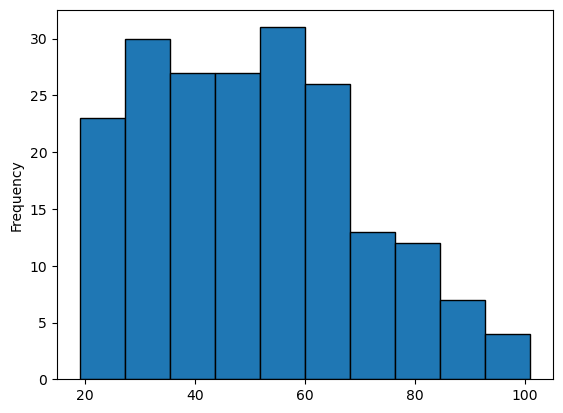

In [12]:
survey_data["age"].plot(kind="hist", edgecolor="black")

In [26]:
max(survey_data["age"])

101

In [23]:
survey_data['age_group'] = pd.qcut(survey_data['age'], q=6)
survey_data["age_group"] = survey_data["age_group"].apply(lambda x: pd.Interval(left=int(round(x.left)), right=int(round(x.right))))

survey_data.groupby("age_group").count()

,name,sex,evote,dob,zip,education,citizenship,marital_status,party,age
age_group,,,,,,,,,,
"(19, 30]",34,34,34,34,34,34,34,34,34,34
"(30, 38]",34,34,34,34,34,34,34,34,34,34
"(38, 48]",34,34,34,34,34,34,34,34,34,34
"(48, 58]",31,31,31,31,31,31,31,31,31,31
"(58, 70]",34,34,34,34,34,34,34,34,34,34
"(70, 101]",33,33,33,33,33,33,33,33,33,33
